In [1]:
from lsst.sims.utils import samplePatchOnSphere, sample_obsmetadata
from lsst.sims.utils import ObservationMetaData
from lsst.sims.catUtils.utils import ObservationMetaDataGenerator

/usr/local/manual/anaconda/lib/python2.7/site-packages/IPython/kernel/__init__.py:13: ShimWarning: The `IPython.kernel` package has been deprecated. You should import from ipykernel or jupyter_client instead.
  "You should import from ipykernel or jupyter_client instead.", ShimWarning)
Duplicate object type id 25 specified: 
Output object ids may not be unique.
This may not be a problem if you do not want globally unique id values
Duplicate object type id 40 specified: 
Output object ids may not be unique.
This may not be a problem if you do not want globally unique id values
Duplicate object type id 40 specified: 
Output object ids may not be unique.
This may not be a problem if you do not want globally unique id values
Duplicate object type id 40 specified: 
Output object ids may not be unique.
This may not be a problem if you do not want globally unique id values
Duplicate object type id 40 specified: 
Output object ids may not be unique.
This may not be a problem if you do not want

In [2]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.patches as mpatch

We will use the samplePatchOnSphere function to find samples in patches of a spherical area. Currently, these patches 
are defined by a phi, theta center and a delta value: so that the area considered is 

phi - delta : phi + delta
theta - delta : theta + delta

The convention is :
theta =0. at the equator, = -pi / 2 at North Pole = pi/2.0 at South Pole

In [3]:
phi_center = np.radians(135.)# * np.pi / 180.
theta_center = np.radians(-60.000)# * np.pi / 180.
delta_val = np.radians(30)

In [4]:
samps = samplePatchOnSphere(phi=phi_center, theta=theta_center, delta=delta_val, size=100, seed=42)

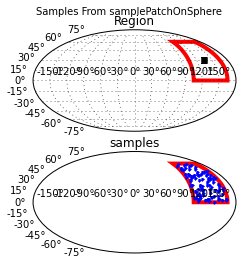

In [6]:
fig = plt.figure();
ax0 = fig.add_subplot(211, projection='mollweide')
ax0.plot([phi_center], [theta_center], 'ks')
#ax.plot(samps[0], samps[1], '.')
ax0.grid(True)
_ = ax0.add_patch(mpatch.Rectangle((phi_center - delta_val, theta_center - delta_val), 2*delta_val, 2*delta_val, 
                              facecolor='white',
                              edgecolor='r', lw=4))
ax0.set_title('Region')
ax1 = fig.add_subplot(212, projection='mollweide')
_ = ax1.plot(samps[0], samps[1], '.')
_ = ax1.add_patch(mpatch.Rectangle((phi_center - delta_val, theta_center - delta_val), 2*delta_val, 2*delta_val, 
                              facecolor='white',
                              edgecolor='r', lw=4))
_ = ax1.set_title('samples')
_ = fig.suptitle('Samples From samplePatchOnSphere')

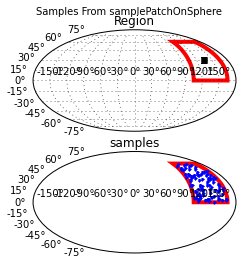

In [7]:
fig

In [8]:
def areaPropTo(theta_min, theta_max):
    
    return np.sin(theta_max) - np.sin(theta_min)# /(np.sin(1.) - np.sin(-1.))
tvals = np.arange(theta_center - delta_val, theta_center+delta_val, 0.001); tvals
tshift = np.zeros(len(tvals))
tshift[:-1] = tvals[1:]

In [9]:
tmp = areaPropTo(tvals, tshift)
normval = np.unique(np.diff(tvals))[0] * np.sum(tmp[:-1])

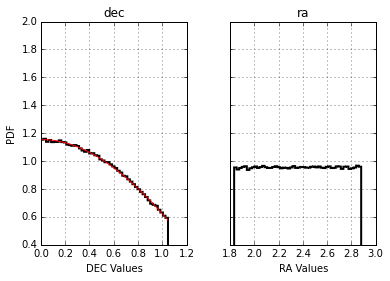

In [10]:
import pandas as pd
dense_samps = samplePatchOnSphere(phi=phi_center, theta=theta_center, delta=delta_val, size=1000000, seed=42)
df = pd.DataFrame({'ra': dense_samps[0], 'dec': dense_samps[1]})
axs = df.hist(sharey=True, **{'histtype':'step', 'lw':2, 'color':'k', 'normed':True, 'bins':50})
axs[0,0].set_ylabel('PDF')
axs[0,0].plot(tvals[:-1], areaPropTo(tvals, tshift)[:-1]/normval,'r-')
axs[0,0].set_xlabel('DEC Values')
axs[0,1].set_xlabel('RA Values')

The red line shows the increase of a quantity proportional to the area of the patch for the bins in DEC values, normalized so that the area under the curve is 1. The Histogram is also normalized to the number of sample points in the DEC bin. On the right is a subplot which shows the ra values binned up. This should be uniform.